In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
#create dataframe for information defined and to be collected

temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
city_names = []

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#set count for city number in for loop
count = 0 

#looping through API  to acquire relevant information
for city in cities:
    query = url + "&q=" + city
    response = requests.get(query).json()
    print(f"Acquiring data on {city} | Number: {count + 1}")
    count += 1
    
    try: 
        city_names.append(response["name"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
    except: 
        print("Not found.")
        pass



Acquiring data on pisco | Number: 1
Acquiring data on bontang | Number: 2
Acquiring data on east london | Number: 3
Acquiring data on mataura | Number: 4
Acquiring data on moose factory | Number: 5
Acquiring data on cidreira | Number: 6
Acquiring data on torbay | Number: 7
Acquiring data on saint george | Number: 8
Acquiring data on honiara | Number: 9
Acquiring data on hobart | Number: 10
Acquiring data on khatanga | Number: 11
Acquiring data on mount isa | Number: 12
Acquiring data on ambilobe | Number: 13
Acquiring data on manggar | Number: 14
Acquiring data on belushya guba | Number: 15
Not found.
Acquiring data on loreto | Number: 16
Acquiring data on floro | Number: 17
Acquiring data on arraial do cabo | Number: 18
Acquiring data on saint-francois | Number: 19
Acquiring data on kudahuvadhoo | Number: 20
Acquiring data on ushuaia | Number: 21
Acquiring data on saskylakh | Number: 22
Acquiring data on busselton | Number: 23
Acquiring data on sitka | Number: 24
Acquiring data on bar

Acquiring data on hilo | Number: 197
Acquiring data on ondorhaan | Number: 198
Not found.
Acquiring data on hualmay | Number: 199
Acquiring data on puqi | Number: 200
Acquiring data on bluff | Number: 201
Acquiring data on haapiti | Number: 202
Acquiring data on humberto de campos | Number: 203
Acquiring data on rio grande | Number: 204
Acquiring data on hervey bay | Number: 205
Acquiring data on champerico | Number: 206
Acquiring data on canon city | Number: 207
Acquiring data on havoysund | Number: 208
Acquiring data on qaanaaq | Number: 209
Acquiring data on umzimvubu | Number: 210
Not found.
Acquiring data on ahipara | Number: 211
Acquiring data on salekhard | Number: 212
Acquiring data on saronno | Number: 213
Acquiring data on kalmanka | Number: 214
Acquiring data on axim | Number: 215
Acquiring data on nemuro | Number: 216
Acquiring data on sidi qasim | Number: 217
Not found.
Acquiring data on saint-augustin | Number: 218
Acquiring data on lompoc | Number: 219
Acquiring data on 

Acquiring data on saucillo | Number: 389
Acquiring data on sovetskiy | Number: 390
Acquiring data on marsh harbour | Number: 391
Acquiring data on barra do corda | Number: 392
Acquiring data on kununurra | Number: 393
Acquiring data on kahului | Number: 394
Acquiring data on gazojak | Number: 395
Acquiring data on gamba | Number: 396
Acquiring data on binzhou | Number: 397
Acquiring data on solano | Number: 398
Acquiring data on basco | Number: 399
Acquiring data on altayskoye | Number: 400
Acquiring data on dharchula | Number: 401
Acquiring data on olinda | Number: 402
Acquiring data on vilhena | Number: 403
Acquiring data on gladstone | Number: 404
Acquiring data on kishangarh | Number: 405
Acquiring data on guarapari | Number: 406
Acquiring data on zhanaozen | Number: 407
Acquiring data on san policarpo | Number: 408
Acquiring data on araouane | Number: 409
Acquiring data on maloy | Number: 410
Acquiring data on guaruja | Number: 411
Acquiring data on pundaguitan | Number: 412
Acqui

Acquiring data on yumen | Number: 585
Acquiring data on igaracu do tiete | Number: 586
Acquiring data on lasa | Number: 587
Acquiring data on torrington | Number: 588
Acquiring data on wuning | Number: 589
Acquiring data on victor harbor | Number: 590
Acquiring data on manzhouli | Number: 591
Acquiring data on udachnyy | Number: 592
Acquiring data on cam ranh | Number: 593
Acquiring data on eskasem | Number: 594
Not found.
Acquiring data on liberty | Number: 595
Acquiring data on bati | Number: 596
Acquiring data on bolobo | Number: 597
Acquiring data on sakaiminato | Number: 598
Acquiring data on tigil | Number: 599
Acquiring data on praia da vitoria | Number: 600
Acquiring data on lincoln | Number: 601
Acquiring data on gravdal | Number: 602
Acquiring data on srandakan | Number: 603
Acquiring data on arkhangelsk | Number: 604
Acquiring data on nizhniy kuranakh | Number: 605
Acquiring data on culebra | Number: 606
Acquiring data on brae | Number: 607
Acquiring data on mitzic | Number:

In [5]:
df = pd.DataFrame({"City": city_names,
                   "Temperature": temperature, 
                   "Humidity": humidity,
                   "Cloudiness": cloudiness, 
                   "Wind Speed": wind_speed,
                   "Latitude": latitude})

df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,Pisco,71.60,30,20,26.40,-13.71
1,Bontang,81.57,100,44,11.32,0.12
2,East London,69.80,73,75,8.05,-33.02
3,Mataura,44.22,89,100,3.15,-46.19
4,Moose Factory,-5.81,83,90,11.41,51.26


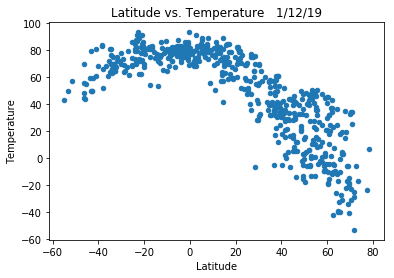

In [6]:
df.plot("Latitude", "Temperature", kind="scatter")
plt.title("Latitude vs. Temperature   1/12/19")
plt.savefig("fig1.png")

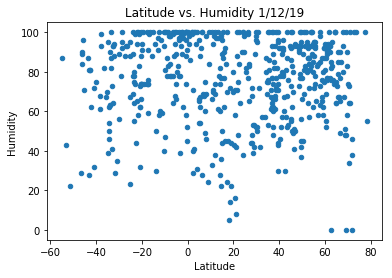

In [7]:
df.plot("Latitude", "Humidity", kind="scatter")
plt.title("Latitude vs. Humidity 1/12/19")
plt.savefig("fig2.png")

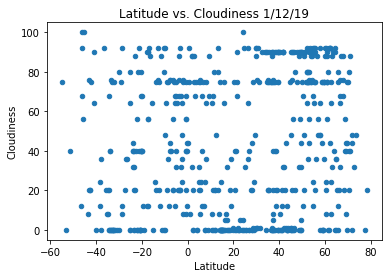

In [8]:
df.plot("Latitude", "Cloudiness", kind="scatter")
plt.title("Latitude vs. Cloudiness 1/12/19")
plt.savefig("fig3.png")

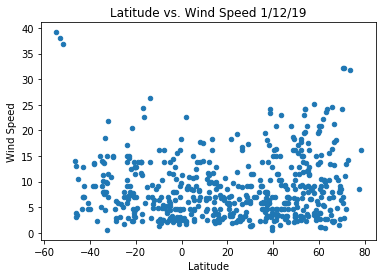

In [9]:
df.plot("Latitude", "Wind Speed", kind="scatter")
plt.title("Latitude vs. Wind Speed 1/12/19")
plt.savefig("fig4.png")

In [10]:
df.to_csv("weather_analysis.csv")

From the above information, one may observe the following trends:

The greater the latitude the lower the temperature. This is indicative of the current winter season in the northern hemisphere. Inversely, the lower the latitude the greater the temperature. As expected, equator regions maintain fairly high temperatures.

Extremely low humidity readings are only present at high latitudes.

Cloudiness does not seem to be effected by location.

Wind speed is greater at both ends of the spectrum.
